## Final Project Submission

Please fill out:
* Student name: Christopher Miley 
* Student pace: flex
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


In [1]:
#load the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the data to work with
aircraft_df = pd.read_csv('data/Aviation_Data.csv')
aircraft_df.head()

<ipython-input-2-20fd87075e1e>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aircraft_df = pd.read_csv('data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#inspect the size of the dataframe
aircraft_df.shape

(90348, 31)

In [4]:
#find the names of all of the columns
aircraft_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
#replace '.' with '_' across the column titles of the dataframe
aircraft_df.columns = aircraft_df.columns.str.replace('.', '_')
print(aircraft_df)

             Event_Id Investigation_Type Accident_Number  Event_Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
90343  20221227106491           Accident      ERA23LA093  2022-12-26   
90344  20221227106494           Accident      ERA23LA095  2022-12-26   
90345  20221227106497           Accident      WPR23LA075  2022-12-26   
90346  20221227106498           Accident      WPR23LA076  2022-12-26   
90347  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude  Longitude Airport_Code  \
0      MOOSE CREEK, ID  United States        NaN        NaN

In [6]:
#determine the different types of Latitude data values
latitude_unique_values = aircraft_df.Latitude.unique()
latitude_types = [type(val) for val in latitude_unique_values]
unique_latitude_types = []
for val in latitude_types:
    if val not in unique_latitude_types:
        unique_latitude_types.append(val)
print(unique_latitude_types)


[<class 'float'>, <class 'str'>]


In [7]:
#convert all values in the Latitude column to strings 
aircraft_df.Latitude = aircraft_df.Latitude.astype(str)
#convert all values in the Longitude column to strings
aircraft_df.Longitude = aircraft_df.Longitude.astype(str)

In [8]:
#check the name of column 28
aircraft_df.columns[28]

'Broad_phase_of_flight'

In [9]:
#look at the unique values and their occurrences for Broad_phase_of_flight
aircraft_df.Broad_phase_of_flight.value_counts(dropna=False)

Broad_phase_of_flight
NaN            28624
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [10]:
#look at example rows where Broad_phase_of_flight is NaN
phase_nan_rows = aircraft_df[aircraft_df.Broad_phase_of_flight.isna()]
phase_nan_rows.iloc[0:2]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
3030,20020917X04924,Accident,MIA83LA011,1982-10-11,"SARASOTA, FL",United States,nan,nan,SRQ,SARASOTA-BRADENTON,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,Probable Cause,11-10-1983
3550,20020917X04800,Accident,LAX83FA061,1982-12-25,"SANTA YSABEL, CA",United States,nan,nan,NaN,MESA GRANDE,...,Unknown,NaN,4.0,0.0,0.0,0.0,VMC,NaN,Probable Cause,25-12-1983


In [11]:
#replace NaN in Broad_phase_of_flight with Unknown
aircraft_df.Broad_phase_of_flight = aircraft_df.Broad_phase_of_flight.fillna("Unknown")
aircraft_df.Broad_phase_of_flight.value_counts(dropna=False)

Broad_phase_of_flight
Unknown        29172
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64

In [12]:
#look at the different values of the Investigation_Type column
print(aircraft_df.Investigation_Type.unique())

['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022'
 '01-11-2022' '01-07-2022' '20-07-2022' '06-10-2022' '23-09-2022'
 '02-12-2022' '05-08-2022' '08-12-2022' '15-12-2022' '20-12-2022']


In [13]:
#look at the number of occurrences of each Investigation_Type value
print(aircraft_df.Investigation_Type.value_counts())

Investigation_Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64


In [14]:
#take a closer look at the entries exluding accident and incident as an investigation type
investigation_excluded_values = ['Accident', 'Incident']
investigation_filtered_data = aircraft_df[~aircraft_df.Investigation_Type.isin(investigation_excluded_values)]
print(investigation_filtered_data)


      Event_Id Investigation_Type Accident_Number Event_Date Location Country  \
64030      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64050      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64052      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64388      NaN         25-09-2020             NaN        NaN      NaN     NaN   
64541      NaN         25-09-2020             NaN        NaN      NaN     NaN   
...        ...                ...             ...        ...      ...     ...   
90004      NaN         15-12-2022             NaN        NaN      NaN     NaN   
90010      NaN         15-12-2022             NaN        NaN      NaN     NaN   
90031      NaN         15-12-2022             NaN        NaN      NaN     NaN   
90090      NaN         20-12-2022             NaN        NaN      NaN     NaN   
90097      NaN         20-12-2022             NaN        NaN      NaN     NaN   

      Latitude Longitude Ai

In [15]:
#look at a few more examples from above
print(aircraft_df[aircraft_df.Investigation_Type.isin(['13-09-2021', '04-08-2021', '05-08-2022', '03-11-2020', '06-01-2021'])])

      Event_Id Investigation_Type Accident_Number Event_Date Location Country  \
74420      NaN         03-11-2020             NaN        NaN      NaN     NaN   
79013      NaN         04-08-2021             NaN        NaN      NaN     NaN   
79821      NaN         13-09-2021             NaN        NaN      NaN     NaN   
84151      NaN         06-01-2021             NaN        NaN      NaN     NaN   
89492      NaN         05-08-2022             NaN        NaN      NaN     NaN   

      Latitude Longitude Airport_Code Airport_Name  ... Purpose_of_flight  \
74420      nan       nan          NaN          NaN  ...               NaN   
79013      nan       nan          NaN          NaN  ...               NaN   
79821      nan       nan          NaN          NaN  ...               NaN   
84151      nan       nan          NaN          NaN  ...               NaN   
89492      nan       nan          NaN          NaN  ...               NaN   

      Air_carrier Total_Fatal_Injuries Total_Serio

In [16]:
#drop all rows that do not contain incident or accident as an investigation type
aircraft_df = aircraft_df[aircraft_df.Investigation_Type.isin(investigation_excluded_values)]
aircraft_df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,nan,nan,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,nan,nan,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,nan,nan,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,nan,nan,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,nan,nan,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,Unknown,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,nan,nan,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,Unknown,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Unknown,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,nan,nan,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,Unknown,NaN,NaN


In [17]:
#double-check the only investigation values are Accident and Incident
aircraft_df.Investigation_Type.unique()

array(['Accident', 'Incident'], dtype=object)

In [18]:
#look at some examples of rows where the Investigation_Type is 'Incident'
print(aircraft_df[aircraft_df.Investigation_Type.isin(['Incident'])])

             Event_Id Investigation_Type Accident_Number  Event_Date  \
23     20020917X02333           Incident      LAX82IA034  1982-01-03   
40     20020917X01764           Incident      ATL82IA029  1982-01-05   
79     20020917X01897           Incident      CHI82IA026  1982-01-12   
80     20020917X01765           Incident      ATL82IA034  1982-01-12   
119    20020917X01766           Incident      ATL82IA038  1982-01-19   
...               ...                ...             ...         ...   
90268  20221125106356           Incident      DCA23WA074  2022-11-21   
90278  20221125106362           Incident      DCA23WA076  2022-11-24   
90280  20221125106357           Incident      DCA23WA075  2022-11-25   
90285  20221222106484           Incident      DCA23WA099  2022-11-26   
90310  20221222106485           Incident      DCA23WA100  2022-12-05   

             Location        Country Latitude Longitude Airport_Code  \
23       VAN NUYS, CA  United States      nan       nan        

In [19]:
#create a dataframe of only incident flights and review their data
incident_aircraft_df = aircraft_df[aircraft_df.Investigation_Type.isin(['Incident'])].reset_index(drop=True)
incident_aircraft_df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,nan,nan,VNY,VAN NUYS,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983
1,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,nan,nan,NaN,NaN,...,Business,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983
2,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,nan,nan,ORD,CHICAGO O'HARE INTER'L,...,Unknown,Trans World Airlines,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
3,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,nan,nan,CKB,BENEDUM,...,Unknown,Aeromech Incorporated,0.0,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983
4,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,nan,nan,IAD,NaN,...,Ferry,NaN,0.0,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983


In [20]:
#check for injuries in incident dataframe
print(incident_aircraft_df.Total_Fatal_Injuries.unique())
print(incident_aircraft_df.Total_Serious_Injuries.unique())
print(incident_aircraft_df.Total_Minor_Injuries.unique())

[ 0. nan  1.  2.  3.]
[ 0. nan  1. 11.  6. 88.  2. 33.  5.  3.  7.  4. 13.  8. 27.  9.]
[  0.  nan   1.  17.  33.  14.   2.   6.  13.   4.   3.  42.   7.  16.
  10.  11.  18.  24.  25.  12.   5.  22.   9.   8.  28. 380.]


In [21]:
#check the different report statuses in incident dataframe
print(incident_aircraft_df.Report_Status.head())
print(incident_aircraft_df.Report_Status.tail())

0    Probable Cause
1    Probable Cause
2    Probable Cause
3    Probable Cause
4    Probable Cause
Name: Report_Status, dtype: object
3869    NaN
3870    NaN
3871    NaN
3872    NaN
3873    NaN
Name: Report_Status, dtype: object


In [22]:
#determine how many entries have a blank report status field in aircraft_df
print(aircraft_df.Report_Status.isnull().sum())

6384


In [23]:
#find the different entries for the carrier 
print(aircraft_df.Air_carrier.value_counts(dropna=False))

Air_carrier
NaN                                  72241
Pilot                                  258
American Airlines                       90
United Airlines                         89
Delta Air Lines                         53
                                     ...  
American Classic Outfitters, Inc.        1
Great Lakes Aviation, Ltd.               1
Harold Parker                            1
Ernie Dale Willis                        1
MC CESSNA 210N LLC                       1
Name: count, Length: 13591, dtype: int64


In [24]:
#find the different entries for the aircraft make
print(aircraft_df.Make.value_counts(dropna=False))

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8238, dtype: int64


In [25]:
#Check the data types that are not a string for the different values in the Make column
make_unique_values = aircraft_df.Make.unique()
make_data_types = {value: type(value).__name__ for value in make_unique_values}
for make, data_type in make_data_types.items():
    if data_type != 'str':
        print(f"Make: {make}, Data Type: {data_type}")

Make: nan, Data Type: float


In [26]:
#Get the sum of rows where the Make column is null
print(aircraft_df.Make.isnull().sum())

63


In [27]:
#Create a new data frame using only the rows where the Make column is null and observe the data
make_null_df = aircraft_df[aircraft_df.Make.isnull()]
print(make_null_df)
print(make_null_df.Model)
print(make_null_df.Aircraft_Category)

             Event_Id Investigation_Type Accident_Number  Event_Date  \
1767   20020917X02887           Accident      ATL82FLQ07  1982-07-01   
1971   20020917X02861           Accident      ATL82FIG10  1982-07-16   
2458   20020917X03618           Accident      LAX82DA316  1982-08-21   
2507   20020917X03865           Accident      MKC82DA156  1982-08-24   
2733   20020917X04964           Accident      MKC82FA171  1982-09-11   
...               ...                ...             ...         ...   
73385  20130307X10950           Incident      DCA13WA062  2013-03-06   
73735  20130531X43222           Incident      DCA13WA097  2013-05-22   
73761  20130808X52306           Incident      CEN13WA470  2013-05-26   
75113  20140327X61657           Accident      ERA14LA174  2014-03-26   
78394  20160314X33602           Incident      ENG16WA009  2016-03-10   

                  Location        Country Latitude Longitude Airport_Code  \
1767         MCWHORTER, KY  United States      nan       n

In [28]:
#Given the lack of details and the miniscule amount of entries with a null entry for Make, remove those 63 from the data frame
aircraft_df.dropna(subset=['Make'], inplace=True)
print(aircraft_df.Make.isnull().sum())

0


In [29]:
#now convert all entries in the Make Column to strings and
#adjust the capitalizations of the make column to eliminate different values of the same make
aircraft_df['Make'] = aircraft_df['Make'].astype(str).str.upper()
print(aircraft_df.Make.value_counts(dropna=False))

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64


In [30]:
#do the same thing for the air carrier
aircraft_df['Air_carrier'] = aircraft_df['Air_carrier'].astype(str).str.upper().replace('NAN', 'NA')
print(aircraft_df.Air_carrier.value_counts(dropna=False))

Air_carrier
NA                         72202
PILOT                        258
UNITED AIRLINES               89
AMERICAN AIRLINES             89
DELTA AIR LINES               53
                           ...  
WORGULL ROBERT C               1
BRANHAM ADVENTURES INC.        1
PRIDMORE-BROWN JULIAN N        1
AURORA AVIATION, LLC           1
MC CESSNA 210N LLC             1
Name: count, Length: 13193, dtype: int64


In [31]:
#do the same thing for the air model
aircraft_df['Model'] = aircraft_df['Model'].astype(str).str.upper()
print(aircraft_df.Model.value_counts(dropna=False))

Model
152                    2367
172                    1756
172N                   1164
PA-28-140               932
150                     829
                       ... 
CHALLENGER 2              1
BUSHBY MUSTANG M-II       1
HARVARD MK II             1
UC45J                     1
M-8 EAGLE                 1
Name: count, Length: 11641, dtype: int64


In [32]:
#examine the dataframe again
print(aircraft_df.head())
print(aircraft_df.tail())

         Event_Id Investigation_Type Accident_Number  Event_Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport_Code  \
0  MOOSE CREEK, ID  United States        nan         nan          NaN   
1   BRIDGEPORT, CA  United States        nan         nan          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        nan         nan          NaN   
4       Canton, OH  United States        nan         nan          NaN   

  Airport_Name  ... Purpose_of_flight Air_carrier Total_Fatal_Injuries  \
0          NaN  ...          Personal          NA                  2.0   
1   

In [33]:
#check the unique values of the airport_name
print(aircraft_df.Airport_Name.value_counts(dropna=False))

Airport_Name
NaN                               36137
Private                             240
PRIVATE                             224
Private Airstrip                    153
NONE                                146
                                  ...  
OTTAWA MUNICIPAL                      1
DWIGHT AIRPORT                        1
PHOENIX DEER VALLEY MUNI              1
SEASIDE PARK                          1
WICHITA DWIGHT D EISENHOWER NT        1
Name: count, Length: 24863, dtype: int64


In [34]:
#capitalize all airport_name entries
aircraft_df.Airport_Name = aircraft_df.Airport_Name.str.upper()
print(aircraft_df.Airport_Name.value_counts(dropna=False))

Airport_Name
NaN                               36137
PRIVATE                             471
PRIVATE AIRSTRIP                    266
PRIVATE STRIP                       161
NONE                                146
                                  ...  
KELLEY'S ISLAND LAND FLD              1
EUREKA MUNICIPAL                      1
NEAR VICTORY                          1
LAKES REGIONAL AIRPORT                1
WICHITA DWIGHT D EISENHOWER NT        1
Name: count, Length: 21560, dtype: int64


In [35]:
#combine NaN with NONE in the airport_name column
aircraft_df.Airport_Name = aircraft_df.Airport_Name.replace('NONE', np.nan)
print(aircraft_df.Airport_Name.value_counts(dropna=False))

Airport_Name
NaN                               36283
PRIVATE                             471
PRIVATE AIRSTRIP                    266
PRIVATE STRIP                       161
MERRILL FIELD                       109
                                  ...  
KELLEY'S ISLAND LAND FLD              1
EUREKA MUNICIPAL                      1
NEAR VICTORY                          1
LAKES REGIONAL AIRPORT                1
WICHITA DWIGHT D EISENHOWER NT        1
Name: count, Length: 21559, dtype: int64


In [36]:
#convert NaN to a string and create one value in the Airport_Name column for entries that are private
aircraft_df.Airport_Name = aircraft_df.Airport_Name.fillna('NA')
aircraft_df.loc[aircraft_df.Airport_Name.str.contains('PRIVATE', case=False), 'Airport_Name'] = 'PRIVATE'
print(aircraft_df.Airport_Name.value_counts(dropna=False))

Airport_Name
NA                                36284
PRIVATE                            1211
MERRILL FIELD                       109
CENTENNIAL                          102
VAN NUYS                             97
                                  ...  
WEST TINIAN                           1
ANTIQUERS                             1
BURNHAM FIELD                         1
NAS GUANTANAMO BAY                    1
WICHITA DWIGHT D EISENHOWER NT        1
Name: count, Length: 21337, dtype: int64


In [37]:
#create one value for unknown, none, na, and nan in the aircraft carrier column
unknown_values = ['none', 'unknown', 'nan']
aircraft_df.Air_carrier = aircraft_df.Air_carrier.replace(['NONE', 'UNKNOWN', 'NAN'], 'NA')
print(aircraft_df.Air_carrier.str.lower().isin(unknown_values))

0        False
1        False
2        False
3        False
4        False
         ...  
90343    False
90344    False
90345    False
90346    False
90347    False
Name: Air_carrier, Length: 88826, dtype: bool


In [38]:
#do the same thing for the Make column
aircraft_df.Make = aircraft_df.Make.replace(['NONE', 'UNKNOWN', 'NAN'], 'NA')

In [39]:
#do the same thing for the Model column
aircraft_df.Model = aircraft_df.Model.replace(['NONE', 'UNKNOWN', 'NAN'], 'NA')

In [40]:
#create a list of the top 10 aircraft makes and calculate their sum of appearances 
top_10_make_counts = aircraft_df.Make.value_counts().head(10).reset_index().values.tolist()
print(top_10_make_counts)
print(sum(count for value, count in top_10_make_counts))

[['CESSNA', 27149], ['PIPER', 14870], ['BEECH', 5372], ['BOEING', 2745], ['BELL', 2722], ['MOONEY', 1334], ['ROBINSON', 1230], ['GRUMMAN', 1172], ['BELLANCA', 1045], ['HUGHES', 932]]
58571


In [41]:
#do the same thing for the Model column, including the corresponding Make value
model_counts = aircraft_df['Model'].value_counts().head(10).reset_index()
model_counts.columns = ['Model', 'Count']

make_counts = aircraft_df.groupby('Model')['Make'].first().reset_index()

result_df = pd.merge(model_counts, make_counts, on='Model')
top_10_model_counts_merged = result_df[['Make', 'Model', 'Count']].values.tolist()
print(top_10_model_counts_merged)
print(result_df['Count'].sum())

[['CESSNA', '152', 2367], ['CESSNA', '172', 1756], ['CESSNA', '172N', 1164], ['PIPER', 'PA-28-140', 932], ['CESSNA', '150', 829], ['CESSNA', '172M', 798], ['CESSNA', '172P', 689], ['CESSNA', '182', 659], ['CESSNA', '180', 622], ['CESSNA', '150M', 585]]
10401


In [42]:
#check which columns still have empty values
columns_with_nan = aircraft_df.columns[aircraft_df.isna().any()]
columns_with_nan

Index(['Location', 'Country', 'Airport_Code', 'Injury_Severity',
       'Aircraft_damage', 'Aircraft_Category', 'Registration_Number',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Report_Status', 'Publication_Date'],
      dtype='object')

In [43]:
#check Location value counts
aircraft_df.Location.value_counts(dropna=False)

Location
ANCHORAGE, AK         434
MIAMI, FL             200
ALBUQUERQUE, NM       196
HOUSTON, TX           193
CHICAGO, IL           184
                     ... 
ST. JOSEPH, LA          1
MILFORD CENTER, OH      1
ELK GARDEN, VA          1
PIURA, Peru             1
Brasnorte,              1
Name: count, Length: 27735, dtype: int64

In [44]:
#check Country value counts
aircraft_df.Country.value_counts(dropna=False)

Country
United States                       82227
Brazil                                371
Mexico                                358
Canada                                357
United Kingdom                        344
                                    ...  
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Malampa                                 1
Turks and Caicos Islands                1
Name: count, Length: 220, dtype: int64

In [45]:
#check Airport_Code value counts
aircraft_df.Airport_Code.value_counts(dropna=False)

Airport_Code
NaN     38708
NONE     1487
PVT       485
APA       160
ORD       149
        ...  
TN95        1
IGI         1
3M8         1
4CO3        1
EIKH        1
Name: count, Length: 10372, dtype: int64

In [46]:
#fill empty Airport_Code entries with "NONE"
aircraft_df.Airport_Code = aircraft_df.Airport_Code.fillna("NONE")
aircraft_df.Airport_Code.value_counts(dropna=False)

Airport_Code
NONE    40195
PVT       485
APA       160
ORD       149
MRI       137
        ...  
TN95        1
IGI         1
3M8         1
4CO3        1
EIKH        1
Name: count, Length: 10371, dtype: int64

In [47]:
#check Injury_Severity value counts
aircraft_df.Injury_Severity.value_counts(dropna=False)

Injury_Severity
Non-Fatal     67332
Fatal(1)       6163
Fatal          5253
Fatal(2)       3709
Incident       2216
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

In [48]:
#check Weather_Condition value counts
aircraft_df.Weather_Condition.value_counts(dropna=False)

Weather_Condition
VMC    77282
IMC     5973
NaN     4454
UNK      855
Unk      262
Name: count, dtype: int64

In [49]:
#capitalize Unk in Weather_Condition column  
aircraft_df.loc[aircraft_df.Weather_Condition == 'Unk', 'Weather_Condition'] = 'UNK'
#fill empty values with UNK
aircraft_df.Weather_Condition.fillna("UNK", inplace=True)
aircraft_df.Weather_Condition.value_counts(dropna=False)

Weather_Condition
VMC    77282
IMC     5973
UNK     5571
Name: count, dtype: int64

In [50]:
#check the value counts of Amateur_Built
aircraft_df.Amateur_Built.value_counts(dropna=False)

Amateur_Built
No     80266
Yes     8460
NaN      100
Name: count, dtype: int64

In [51]:
#check the value count of Number_of_Engines
aircraft_df.Number_of_Engines.value_counts(dropna=False)

Number_of_Engines
1.0    69569
2.0    11078
NaN     6035
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [52]:
#check the value count of Engine_Type
aircraft_df.Engine_Type.value_counts(dropna=False)

Engine_Type
Reciprocating      69519
NaN                 7045
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2050
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [53]:
#replace UNK and NaN with Unknown in Engine_Type column 
aircraft_df.loc[aircraft_df.Engine_Type == 'UNK', 'Engine_Type'] = 'Unknown'
aircraft_df.Engine_Type = aircraft_df.Engine_Type.fillna("Unknown")
aircraft_df.Engine_Type.value_counts(dropna=False)

Engine_Type
Reciprocating      69519
Unknown             9096
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
Name: count, dtype: int64

In [54]:
#rename Aircraft_damage to Aircraft_Damage and check the value counts of Aircraft_Damage
aircraft_df = aircraft_df.rename(columns={'Aircraft_damage': 'Aircraft_Damage'})
aircraft_df.Aircraft_Damage.value_counts(dropna=False)

Aircraft_Damage
Substantial    64124
Destroyed      18612
NaN             3176
Minor           2795
Unknown          119
Name: count, dtype: int64

In [55]:
#fill empty values in Aircraft_Damage with Unknown
aircraft_df.Aircraft_Damage = aircraft_df.Aircraft_Damage.fillna('Unknown')
aircraft_df.Aircraft_Damage.value_counts(dropna=False)

Aircraft_Damage
Substantial    64124
Destroyed      18612
Unknown         3295
Minor           2795
Name: count, dtype: int64

In [56]:
#check the value counts for Aircraft_Category
aircraft_df.Aircraft_Category.value_counts(dropna=False)

Aircraft_Category
NaN                  56551
Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [57]:
#replace UNK and NaN with Unknown in Aircraft_Category
aircraft_df.loc[aircraft_df.Aircraft_Category == 'UNK', 'Aircraft_Category'] = 'Unknown'
aircraft_df.Aircraft_Category = aircraft_df.Aircraft_Category.fillna('Unknown')
aircraft_df.Aircraft_Category.value_counts(dropna=False)

Aircraft_Category
Unknown              56567
Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Powered-Lift             5
Blimp                    4
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [58]:
#drop all rows except ones in which the Aircraft_Category is either Unknown, Airplane, or 
#Helicopter
aircraft_categories = ['Unknown', 'Airplane', 'Helicopter']
aircraft_df = aircraft_df[aircraft_df.Aircraft_Category.isin(aircraft_categories)].reset_index(drop=True)
aircraft_df.Aircraft_Category.value_counts(dropna=False)

Aircraft_Category
Unknown       56567
Airplane      27608
Helicopter     3437
Name: count, dtype: int64

In [59]:
#check value counts of Schedule
aircraft_df.Schedule.value_counts(dropna=False)

Schedule
NaN     75091
NSCH     4443
UNK      4099
SCHD     3979
Name: count, dtype: int64

In [60]:
#fill NaN in Schedule column with UNK
aircraft_df.Schedule = aircraft_df.Schedule.fillna("UNK")
aircraft_df.Schedule.value_counts(dropna=False)

Schedule
UNK     79190
NSCH     4443
SCHD     3979
Name: count, dtype: int64

In [61]:
#check value counts of FAR_Description
aircraft_df.FAR_Description.value_counts(dropna=False)

FAR_Description
NaN                               56848
091                               17288
Part 91: General Aviation          6221
NUSN                               1573
137                                1010
NUSC                                989
135                                 746
121                                 674
Part 137: Agricultural              437
UNK                                 364
Part 135: Air Taxi & Commuter       298
PUBU                                251
129                                 244
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                    98
Non-U.S., Non-Commercial             96
Non-U.S., Commercial                 91
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           18
091K                                 14
ARMF                                  7
125                                   5
Part 125: 20+ Pax,6000+ 

In [62]:
#fill empty values in FAR_Description with Unknown
aircraft_df.FAR_Description = aircraft_df.FAR_Description.fillna("Unknown")
aircraft_df.FAR_Description.value_counts(dropna=False)

FAR_Description
Unknown                           56870
091                               17288
Part 91: General Aviation          6221
NUSN                               1573
137                                1010
NUSC                                989
135                                 746
121                                 674
Part 137: Agricultural              437
UNK                                 364
Part 135: Air Taxi & Commuter       298
PUBU                                251
129                                 244
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                    98
Non-U.S., Non-Commercial             96
Non-U.S., Commercial                 91
Part 133: Rotorcraft Ext. Load       32
Public Use                           18
091K                                 14
ARMF                                  7
125                                   5
Part 125: 20+ Pax,6000+ lbs           5
107                     

In [63]:
#check the value counts in Purpose_of_flight
aircraft_df.Purpose_of_flight.value_counts(dropna=False)

Purpose_of_flight
Personal                     48555
Instructional                10473
Unknown                       6777
NaN                           6133
Aerial Application            4712
Business                      3986
Positioning                   1644
Other Work Use                1207
Ferry                          812
Aerial Observation             768
Public Aircraft                719
Executive/corporate            553
Flight Test                    389
Skydiving                      181
External Load                  122
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   78
Public Aircraft - Local         73
Public Aircraft - State         64
Air Race/show                   56
Glider Tow                      42
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [64]:
#fill empty fields on Purpose_of_flight with Unknown
aircraft_df.Purpose_of_flight = aircraft_df.Purpose_of_flight.fillna("Unknown")
aircraft_df.Purpose_of_flight.value_counts(dropna=False)

Purpose_of_flight
Personal                     48555
Unknown                      12910
Instructional                10473
Aerial Application            4712
Business                      3986
Positioning                   1644
Other Work Use                1207
Ferry                          812
Aerial Observation             768
Public Aircraft                719
Executive/corporate            553
Flight Test                    389
Skydiving                      181
External Load                  122
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   78
Public Aircraft - Local         73
Public Aircraft - State         64
Air Race/show                   56
Glider Tow                      42
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [65]:
#make all entries containing Public Aircraft in Purpose_of_flight column one spelling
aircraft_df.loc[aircraft_df.Purpose_of_flight.str.contains('Public Aircraft', na=False), 'Purpose_of_flight'] = 'Public Aircraft'
aircraft_df.Purpose_of_flight.value_counts()

Purpose_of_flight
Personal               48555
Unknown                12910
Instructional          10473
Aerial Application      4712
Business                3986
Positioning             1644
Other Work Use          1207
Public Aircraft          961
Ferry                    812
Aerial Observation       768
Executive/corporate      553
Flight Test              389
Skydiving                181
External Load            122
Banner Tow               101
Air Race show             78
Air Race/show             56
Glider Tow                42
Firefighting              40
Air Drop                  11
ASHO                       6
PUBS                       4
PUBL                       1
Name: count, dtype: int64

In [66]:
#drop all rows except ones in which the Purpose_of_flight is either Personal, Instructional,  
#Unknown, Aerial Application, Business, Positioning, Other Work Use, Ferry, Aerial Observation, Public Aircraft, Executive/Corporate, or Flight Test
purpose_categories = ['Personal', 'Unknown', 'Instructional', 'Aerial Application', 'Business', 'Positioning', 'Other Work Use', 'Public Aircraft', 'Ferry', 'Aerial Observation', 'Executive/corporate', 'Flight Test']
aircraft_df = aircraft_df[aircraft_df.Purpose_of_flight.isin(purpose_categories)].reset_index(drop=True)
aircraft_df.Purpose_of_flight.value_counts(dropna=False)

Purpose_of_flight
Personal               48555
Unknown                12910
Instructional          10473
Aerial Application      4712
Business                3986
Positioning             1644
Other Work Use          1207
Public Aircraft          961
Ferry                    812
Aerial Observation       768
Executive/corporate      553
Flight Test              389
Name: count, dtype: int64

In [67]:
#look at the most common Make values
aircraft_df.Make.value_counts()

Make
CESSNA               26978
PIPER                14790
BEECH                 5351
BOEING                2735
BELL                  2678
                     ...  
HAZELRIGE                1
MASKO                    1
FRANK H MARCHETTI        1
SHANKLIN                 1
ROYSE RALPH L            1
Name: count, Length: 7196, dtype: int64

In [68]:
#calculate the fatalities for CESSNA accidents
cessna_fatal_injuries = aircraft_df.loc[aircraft_df.Make == 'CESSNA', 'Total_Fatal_Injuries'].sum()
cessna_fatal_injuries

9518.0

In [69]:
#check the sum of Total_Fatal_Injuries of the entire dataframe
aircraft_df.Total_Fatal_Injuries.sum()

49418.0

In [70]:
#make a series of the top 5 makes and their occurences
top_5_make_counts = aircraft_df.Make.value_counts().head(5)
top_5_make_counts

Make
CESSNA    26978
PIPER     14790
BEECH      5351
BOEING     2735
BELL       2678
Name: count, dtype: int64

In [71]:
#create a table of the top 5 for Makea, Accidents, and Total_Fatal_Injuries
make_fatalities = aircraft_df.groupby('Make')['Total_Fatal_Injuries'].sum()
merged_make_fatal_df = pd.DataFrame({'Make': top_5_make_counts.index, 'Counts': top_5_make_counts.values})
merged_make_fatal_df = merged_make_fatal_df.merge(make_fatalities, on='Make')
merged_make_fatal_df = merged_make_fatal_df.rename(columns={'Total_Fatal_Injuries_x': 'Total_Fatal_Injuries', 'Counts': 'Accidents'})
merged_make_fatal_df

,Make,Accidents,Total_Fatal_Injuries
0,CESSNA,26978,9518.0
1,PIPER,14790,6673.0
2,BEECH,5351,3708.0
3,BOEING,2735,8738.0
4,BELL,2678,1301.0


In [72]:
#create a series of the top 5 total fatal injuries by make
total_fatal_injuries = aircraft_df.groupby('Make')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)
total_fatal_injuries_df = pd.DataFrame({'Make': total_fatal_injuries.index, 'Total_Fatal_Injuries': total_fatal_injuries.values})
total_fatal_injuries_df = total_fatal_injuries_df.head(5)
total_fatal_injuries_df

,Make,Total_Fatal_Injuries
0,CESSNA,9518.0
1,BOEING,8738.0
2,PIPER,6673.0
3,BEECH,3708.0
4,AIRBUS,1325.0


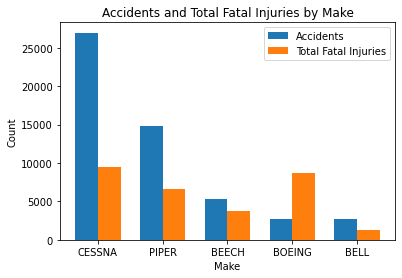

In [73]:
#plot a double bar chart to represent the top 5 makes to appear and their total fatalities

#set bar width
bar_width = 0.35

#set the index
index = np.arange(len(merged_make_fatal_df['Make']))

#plot the bar chart
plt.bar(index, merged_make_fatal_df['Accidents'], bar_width, label='Accidents')
plt.bar(index + bar_width, merged_make_fatal_df['Total_Fatal_Injuries'], bar_width, label='Total Fatal Injuries')

#label the axis and title
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Accidents and Total Fatal Injuries by Make')

#adjust the x ticks
plt.xticks(index + bar_width/2, merged_make_fatal_df['Make'])

#create a legend and show the graph
plt.legend()
plt.show()

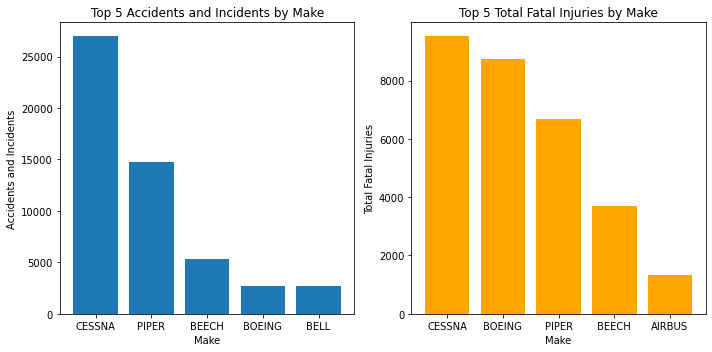

In [74]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar graph for 'Accidents/Incidents'
ax1.bar(merged_make_fatal_df['Make'], merged_make_fatal_df['Accidents'])
ax1.set_xlabel('Make')
ax1.set_ylabel('Accidents and Incidents')
ax1.set_title('Top 5 Accidents and Incidents by Make')

# Plot the second bar graph for 'Total_Fatal_Injuries'
ax2.bar(total_fatal_injuries_df['Make'], total_fatal_injuries_df['Total_Fatal_Injuries'], color='orange')
ax2.set_xlabel('Make')
ax2.set_ylabel('Total Fatal Injuries')
ax2.set_title('Top 5 Total Fatal Injuries by Make')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [75]:
#change the Event_Date column to datetimelike values
aircraft_df['Event_Date'] = pd.to_datetime(aircraft_df['Event_Date'])
#create a Year column from the Event_Date values 
aircraft_df['Year'] = aircraft_df['Event_Date'].dt.year
aircraft_df['Year']


0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
86965    2022
86966    2022
86967    2022
86968    2022
86969    2022
Name: Year, Length: 86970, dtype: int32

In [76]:
#group the data into a frame containing Year, Weather_Condition, Aircraft_Damage, Total_Fatal_Injuries, Total_Serious_Injuries, Total_Minor_Injuries, Total_Uninjured
injured_grouped_df = aircraft_df.groupby(['Year', 'Weather_Condition', 'Aircraft_Damage']).agg({'Total_Fatal_Injuries': 'sum', 'Total_Serious_Injuries': 'sum', 'Total_Minor_Injuries': 'sum', 'Total_Uninjured': 'sum'}).reset_index()

#convert the year to an integer type
injured_grouped_df.Year = injured_grouped_df.Year.astype(int)

#filter out entries prior to 1980
injured_grouped_df = injured_grouped_df[injured_grouped_df.Year >= 1980]

#create another column Total_Injuries that combines the three Injuries columns
injured_grouped_df['Total_Injuries'] = injured_grouped_df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries']].sum(axis=1)

#reset the index
injured_grouped_df = injured_grouped_df.reset_index(drop=True)
injured_grouped_df

,Year,Weather_Condition,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Total_Injuries
0,1981,IMC,Destroyed,4.0,0.0,0.0,0.0,4.0
1,1982,IMC,Destroyed,427.0,65.0,65.0,201.0,557.0
2,1982,IMC,Minor,0.0,1.0,33.0,651.0,34.0
3,1982,IMC,Substantial,18.0,14.0,43.0,188.0,75.0
4,1982,IMC,Unknown,2.0,0.0,0.0,192.0,2.0
...,...,...,...,...,...,...,...,...
472,2022,UNK,Unknown,53.0,39.0,25.0,5470.0,117.0
473,2022,VMC,Destroyed,106.0,5.0,21.0,7.0,132.0
474,2022,VMC,Minor,2.0,1.0,3.0,90.0,6.0
475,2022,VMC,Substantial,123.0,227.0,152.0,1003.0,502.0


In [77]:
# Filter the DataFrame to exclude Unknown from Aircraft_Damage
injured_grouped_filtered_df = injured_grouped_df[injured_grouped_df['Aircraft_Damage'] != 'Unknown']
injured_grouped_filtered_df.Aircraft_Damage.value_counts(dropna=False)

Aircraft_Damage
Destroyed      124
Substantial    123
Minor          114
Name: count, dtype: int64

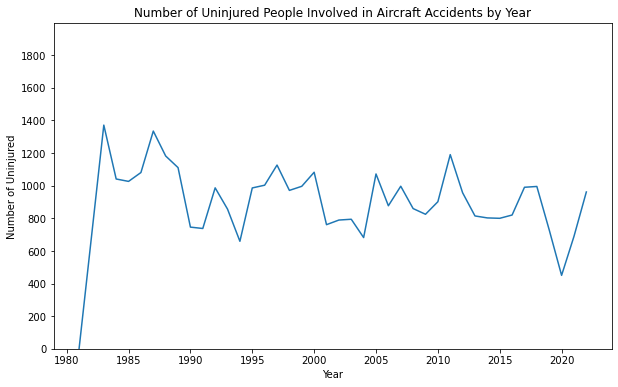

In [78]:
#create a plot 
plt.figure(figsize=(10, 6))

#plot a line graph of Total Uninjured People by Year in Accidents
sns.lineplot(data=injured_grouped_df, x='Year', y='Total_Uninjured', ci=None)

#customize the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Uninjured')
plt.title('Number of Uninjured People Involved in Aircraft Accidents by Year')

#customize the ticks and limit of the Y axis
plt.xticks(range(1980, 2023, 5))
plt.yticks(range(0, 2000, 200))
plt.ylim(0, 2000)

#show the graph
plt.show()

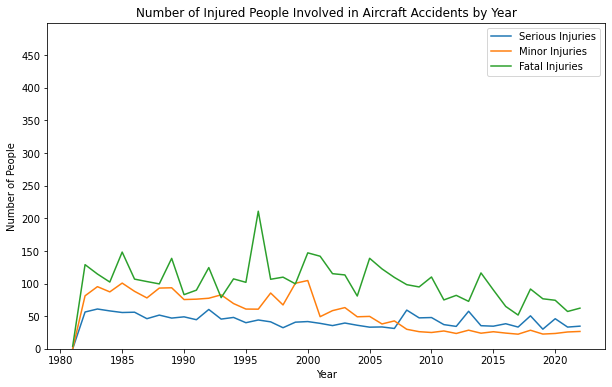

In [79]:
#create a plot
plt.figure(figsize=(10, 6))

#create a line graph for the three types of Injuries
sns.lineplot(data=injured_grouped_df, x='Year', y='Total_Serious_Injuries', label='Serious Injuries', ci=None)
sns.lineplot(data=injured_grouped_df, x='Year', y='Total_Minor_Injuries', label='Minor Injuries', ci=None)
sns.lineplot(data=injured_grouped_df, x='Year', y='Total_Fatal_Injuries', label='Fatal Injuries', ci=None)

#customize the labels and title
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Number of Injured People Involved in Aircraft Accidents by Year')

#customize the ticks and Y limit
plt.xticks(range(1980, 2023, 5))
plt.yticks(range(0, 500, 50))
plt.ylim(0, 500)

#show the legend and graph
plt.legend()
plt.show()

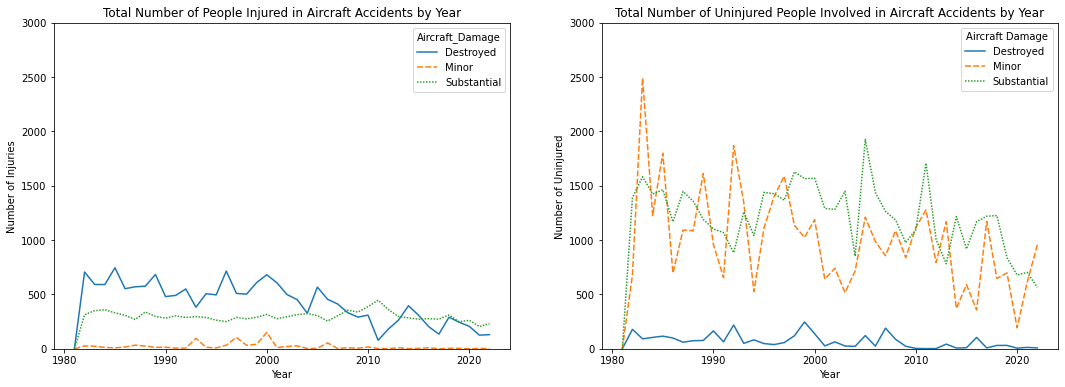

In [80]:
#create a plot for two separate graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Create a pivot table to reshape the data
injured_pivot_df = injured_grouped_filtered_df.pivot_table(index='Year', columns='Aircraft_Damage', values='Total_Injuries', fill_value=0)
uninjured_pivot_df = injured_grouped_filtered_df.pivot_table(index='Year', columns='Aircraft_Damage', values='Total_Uninjured', fill_value=0)

# Create a Total Injuries line plot using Seaborn
sns.lineplot(data=injured_pivot_df, ax=ax1)

# Set the labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Injuries')
ax1.set_title('Total Number of People Injured in Aircraft Accidents by Year')

#set the y lim
ax1.set_ylim(0, 3000)

# Create a Total Uninjured line plot using Seaborn
sns.lineplot(data=uninjured_pivot_df, ax=ax2)

# Set the labels and title 
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Uninjured')
ax2.set_title('Total Number of Uninjured People Involved in Aircraft Accidents by Year')

#set the y lim
ax2.set_ylim(0, 3000)

# Display the legend and show the plot
plt.legend(title='Aircraft Damage')
plt.show()

In [81]:
#create a dataframe based on the Make and Aircraft_Damage columns
make_damage_grouped_df = aircraft_df.groupby(['Make', 'Aircraft_Damage']).size().sort_values(ascending=False).reset_index(name='Count')

# Filter the DataFrame to only show Destroyed from Aircraft_Damage
make_damage_destroyed_df = make_damage_grouped_df[make_damage_grouped_df['Aircraft_Damage'] == 'Destroyed']

#create a top 10
top10_make_damage_destroyed_df = make_damage_destroyed_df.head(10).reset_index(drop=True)

#Filter the DataFrame to only show Minor from Aircraft_Damage
make_damage_minor_df = make_damage_grouped_df[make_damage_grouped_df['Aircraft_Damage'] == 'Minor']

#create a top 10
top10_make_damage_minor_df = make_damage_minor_df.head(10).reset_index(drop=True)
print(top10_make_damage_destroyed_df)
print(top10_make_damage_minor_df)

       Make Aircraft_Damage  Count
0    CESSNA       Destroyed   5172
1     PIPER       Destroyed   3423
2     BEECH       Destroyed   1576
3      BELL       Destroyed    696
4    MOONEY       Destroyed    373
5   GRUMMAN       Destroyed    298
6  ROBINSON       Destroyed    282
7  BELLANCA       Destroyed    231
8    HUGHES       Destroyed    187
9    BOEING       Destroyed    166
                Make Aircraft_Damage  Count
0             BOEING           Minor    710
1             CESSNA           Minor    383
2              PIPER           Minor    204
3              BEECH           Minor    168
4  MCDONNELL DOUGLAS           Minor    162
5             AIRBUS           Minor     59
6            DOUGLAS           Minor     54
7   AIRBUS INDUSTRIE           Minor     51
8            EMBRAER           Minor     49
9               BELL           Minor     47


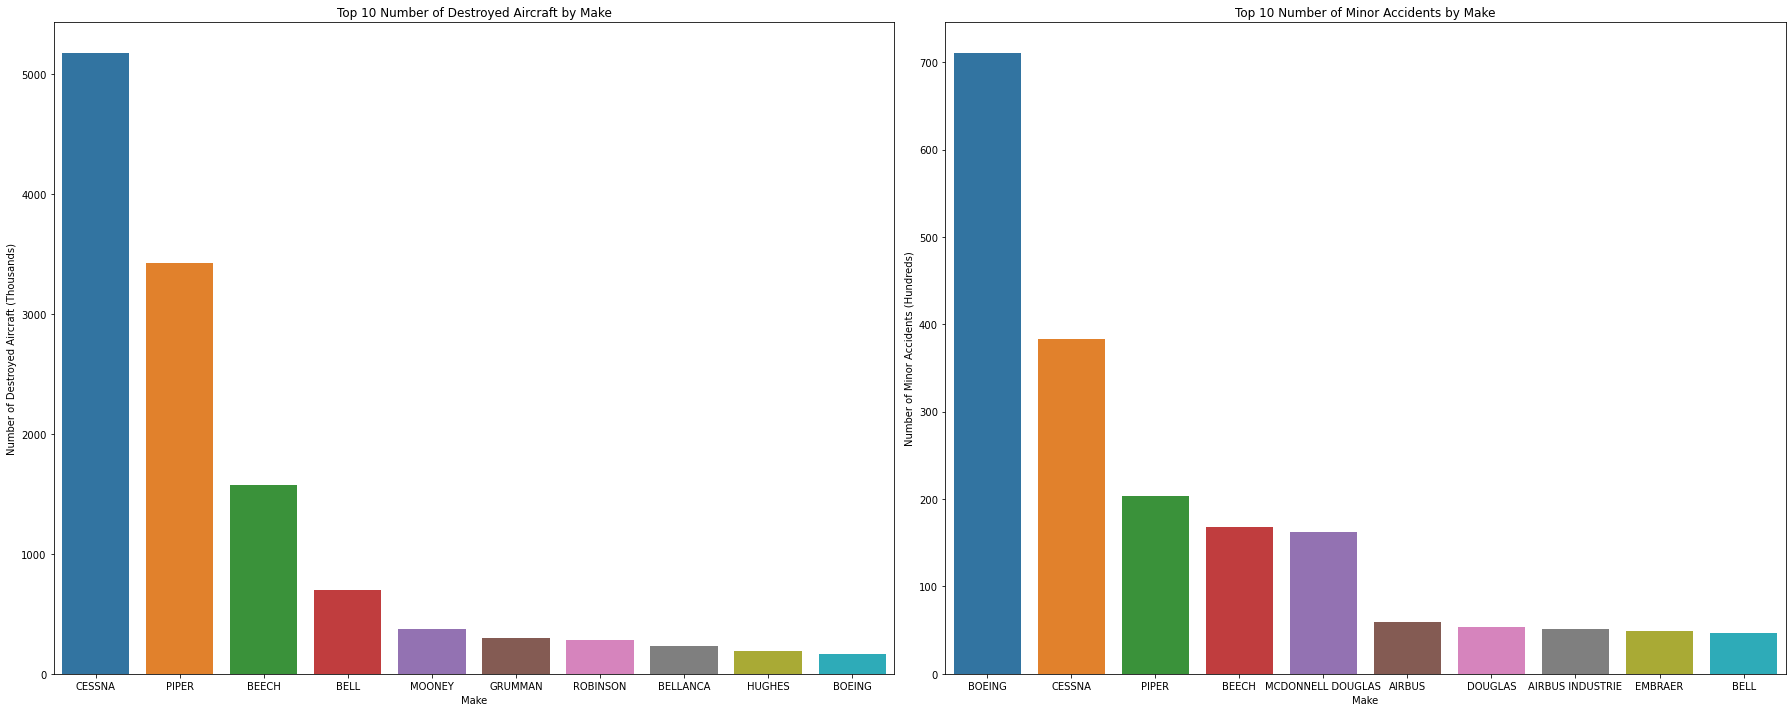

In [82]:
#create a plot for two separate graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

#create a Destroyed Make bar plot using Seaborn
sns.barplot(data=top10_make_damage_destroyed_df, x='Make', y='Count', ax=ax1)

#set the labels and title
ax1.set_xlabel('Make')
ax1.set_ylabel('Number of Destroyed Aircraft (Thousands)')
ax1.set_title('Top 10 Number of Destroyed Aircraft by Make')


#create a Minor Make bar plot using Seaborn
sns.barplot(data=top10_make_damage_minor_df, x='Make', y='Count', ax=ax2)

#set the labels and title
ax2.set_xlabel('Make')
ax2.set_ylabel('Number of Minor Accidents (Hundreds)')
ax2.set_title('Top 10 Number of Minor Accidents by Make')

#adjust the spacing
plt.tight_layout()

#show the graph
plt.show()

In [83]:
#create a dataframe with the columns Number_of_Engines, Amateur_Built, Total_Fatal_Injuries, and Total_Uninjured and reset the index
engine_grouped_df = aircraft_df.groupby(['Number_of_Engines', 'Amateur_Built']).agg({'Total_Fatal_Injuries': 'sum', 'Total_Uninjured': 'sum'}).reset_index()
engine_grouped_df

,Number_of_Engines,Amateur_Built,Total_Fatal_Injuries,Total_Uninjured
0,0.0,No,321.0,2372.0
1,0.0,Yes,27.0,11.0
2,1.0,No,18922.0,67739.0
3,1.0,Yes,2775.0,4653.0
4,2.0,No,10344.0,194599.0
5,2.0,Yes,44.0,489.0
6,3.0,No,878.0,51245.0
7,3.0,Yes,0.0,137.0
8,4.0,No,1656.0,40876.0
9,4.0,Yes,1.0,17.0


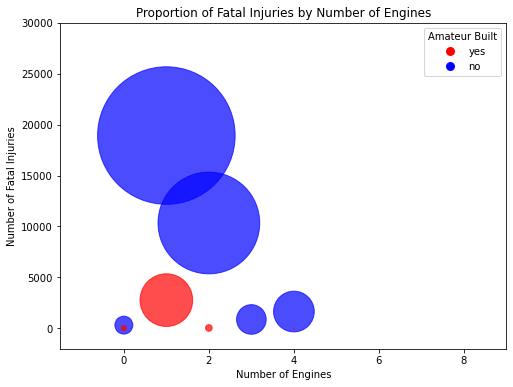

In [84]:
#create a plot
plt.figure(figsize=(8, 6))

#create a scatter plot of fatal injuries by number of engines with matplotlib and color code yes/no for amateur built
plt.scatter(engine_grouped_df['Number_of_Engines'], engine_grouped_df['Total_Fatal_Injuries'], s=engine_grouped_df['Total_Fatal_Injuries'], alpha=0.7, c=engine_grouped_df.Amateur_Built.map({'Yes': 'red', 'No': 'blue'}))

#customize the labels and title
plt.xlabel('Number of Engines')
plt.ylabel('Number of Fatal Injuries')
plt.title('Proportion of Fatal Injuries by Number of Engines')

#customize the xlim and ylim
plt.xlim(-1.5, engine_grouped_df['Number_of_Engines'].max() + 1)
plt.ylim(-2000, 30000)

#customize the legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='yes', markerfacecolor='red', markersize=10), plt.Line2D([0], [0], marker='o', color='w', label='no', markerfacecolor='blue', markersize=10)]

#show the legend and plot
plt.legend(handles=legend_elements, title='Amateur Built')
plt.show()

In [85]:
#create a modified dataset to use for Tableau
#aircraft_df.to_csv('modified_aircraft_data.csv', index=False)